   Unnamed: 0                 rawid              roi  volume   min    max  \
0           1  kirby127a_3_1_ax.img  Telencephalon_L  531111   0.0  374.0   
1           2  kirby127a_3_1_ax.img  Telencephalon_R  543404   0.0  300.0   
2           3  kirby127a_3_1_ax.img   Diencephalon_L    9683  15.0  295.0   
3           4  kirby127a_3_1_ax.img   Diencephalon_R    9678  10.0  335.0   

       mean      std  type  level   id      icv      tbv  
0  128.3013  51.8593     1      1  127  1378295  1268519  
1  135.0683  53.6471     1      1  127  1378295  1268519  
2  193.5488  32.2733     1      1  127  1378295  1268519  
3  193.7051  32.7869     1      1  127  1378295  1268519  
       Unnamed: 0             rawid              roi  volume   min    max  \
12540       12541  kirby906a_ax.img  Telencephalon_L  467063   2.0  350.0   
12541       12542  kirby906a_ax.img  Telencephalon_R  470488   2.0  337.0   
12542       12543  kirby906a_ax.img   Diencephalon_L    8801  60.0  327.0   
12543      

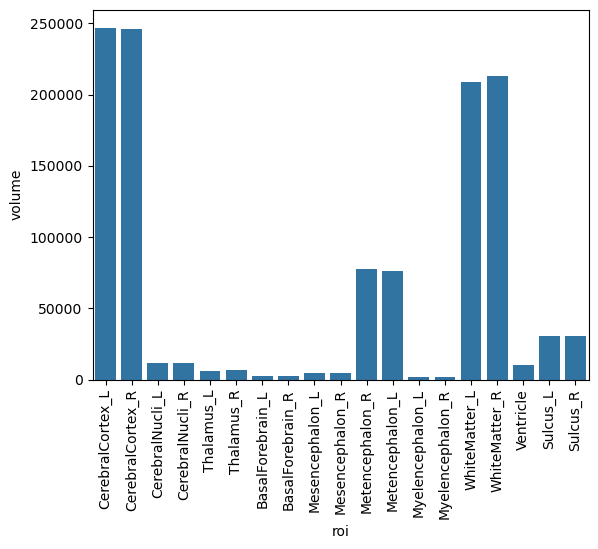

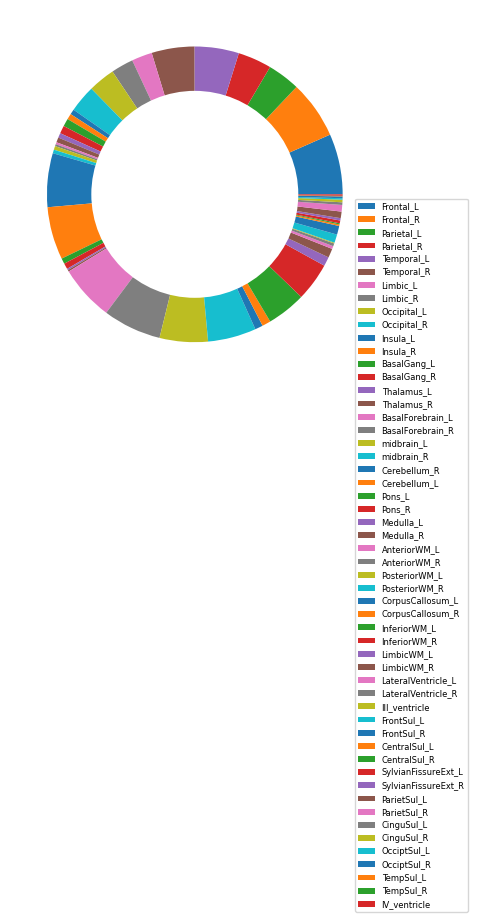

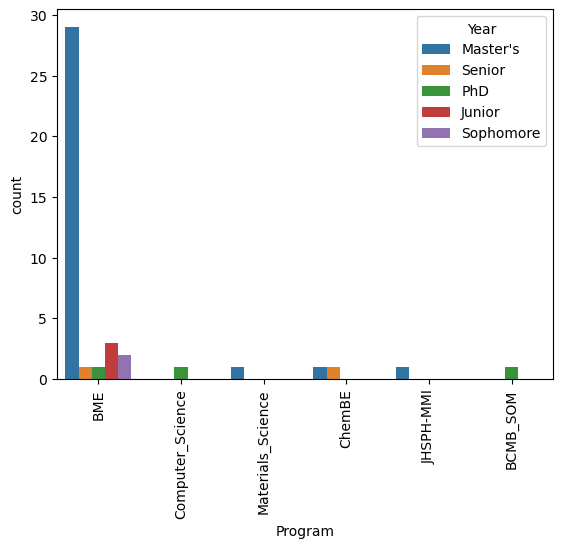

  Unnamed: 0  GSM25581.CEL.gz  GSM25681.CEL.gz  GSM136524.CEL.gz  \
0  1007_s_at         6.333951         5.736190          6.156754   
1    1053_at         7.255622         7.399993          7.491967   
2     117_at         5.760106         4.825169          5.039387   
3     121_at         6.935451         7.025210          7.543667   

   GSM136707.CEL.gz  GSM25553.CEL.gz  GSM136676.CEL.gz  GSM136711.CEL.gz  \
0          6.513010         6.061013          6.506493          6.863426   
1          7.006123         7.250995          7.082581          6.842236   
2          5.414160         5.205697          5.300078          5.099337   
3          7.959781         7.223323          8.006816          8.102504   

   GSM136542.CEL.gz  GSM136535.CEL.gz  ...  GSM48650.CEL.gz  GSM25687.CEL.gz  \
0          6.369645          6.646321  ...         7.082636         6.315866   
1          7.048487          7.042361  ...         6.599718         7.412731   
2          5.156459          5.736109 

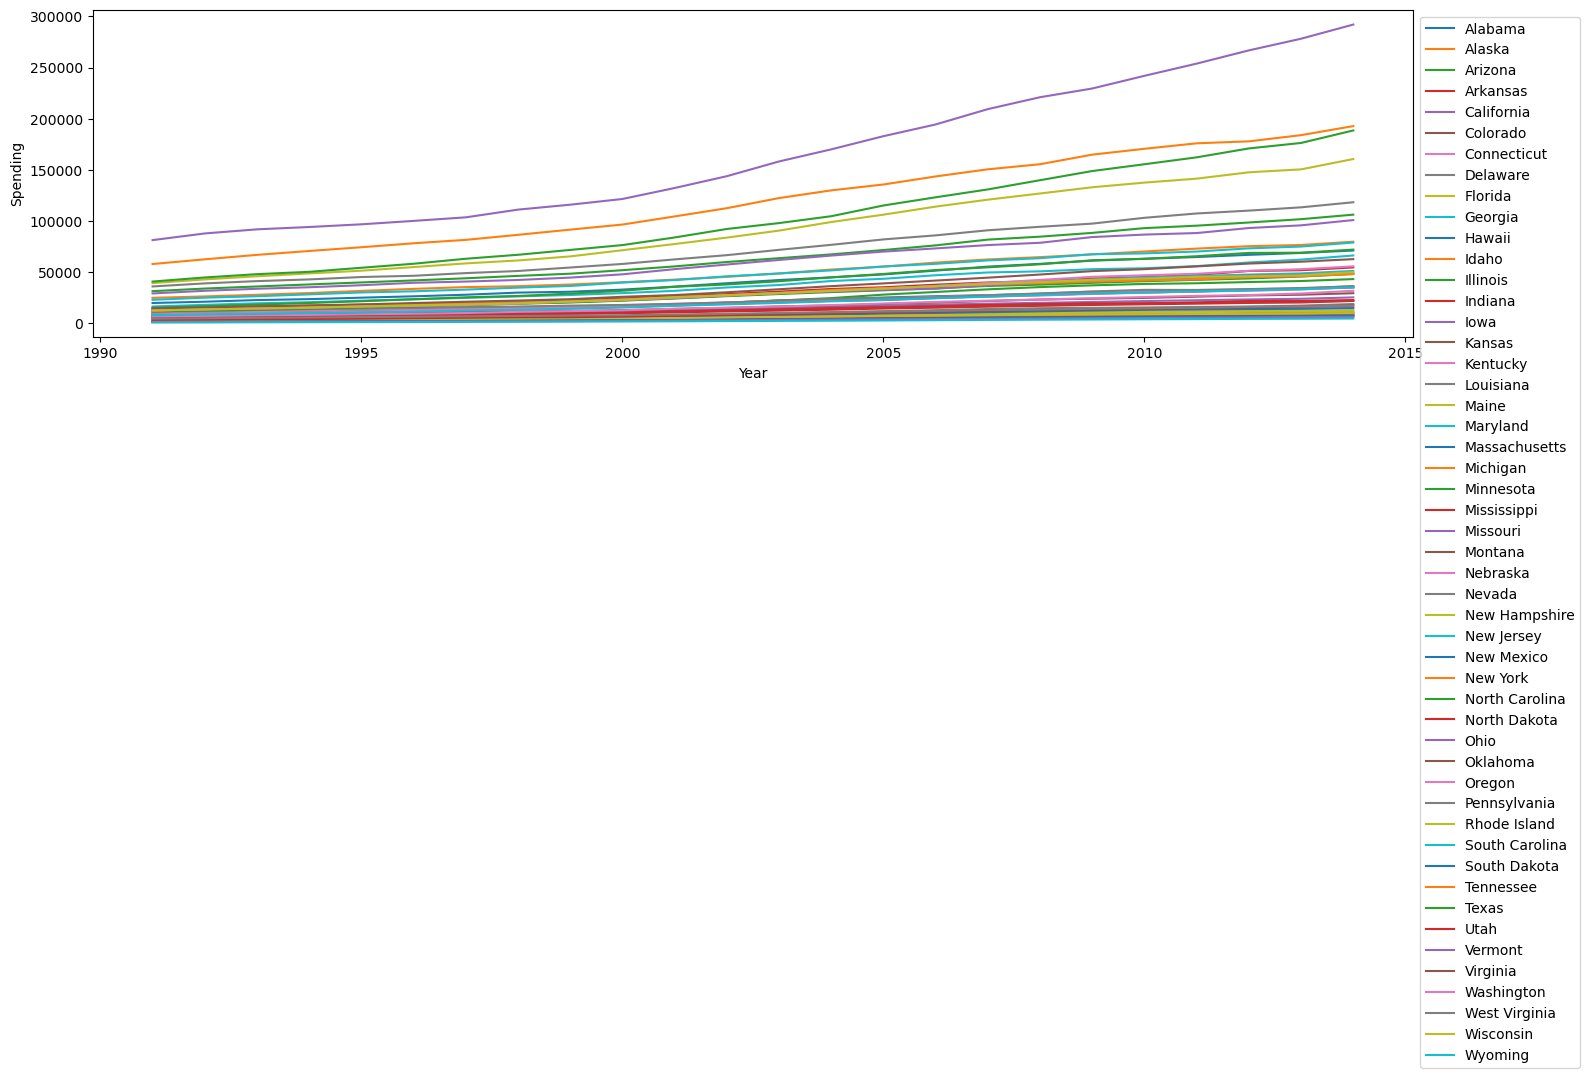

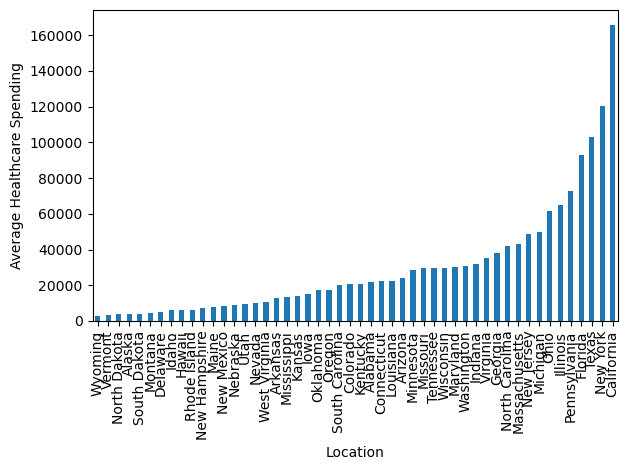

In [215]:
## Matthew Lamblaot homework 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### questions using Kirb21 data


kirb21_df= pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv") ## reading csv file
print(kirb21_df.head(4)) ## checking csv file contents
kirby906a_ax_df= kirb21_df.loc[(kirb21_df['rawid']=="kirby906a_ax.img")].copy() ##creating new dataframe with only values that where rawid= kirby906a_ax.img
print(kirby906a_ax_df.head(4)) # print new dataframe
telencephalon_L= kirby906a_ax_df.loc[(kirby906a_ax_df['type'] ==1) & (kirby906a_ax_df['level'] ==1) & (kirby906a_ax_df['roi'] =='Telencephalon_L')].copy() ##creating new dataframe that only consists of type1 level1 data for Telecephalon_L
print(telencephalon_L.head(4)) 
telencephalon_L_volume= telencephalon_L.loc[12540,'volume'] ##assigning new variable to be the value for volume of this dataframe
print(telencephalon_L_volume) #printing volume value

telencephalon_R= kirby906a_ax_df.loc[(kirby906a_ax_df['type'] ==1) & (kirby906a_ax_df['level'] ==1) & (kirby906a_ax_df['roi'] =='Telencephalon_R')].copy()##creating new dataframe that only consists of type1 level1 data for Telecephalon_R
print(telencephalon_R.head(4))
telencephalon_R_volume= telencephalon_R.loc[12541,'volume']##assigning new variable to be the value for volume of this dataframe
print(telencephalon_R_volume) # printing volume value

ICV_fraction= (telencephalon_L_volume+telencephalon_R_volume)/kirby906a_ax_df.loc[12540,'icv'] ##creating ICV fraction variable that is the fraction of telencephalon volume to ICV
TBV_fraction= (telencephalon_L_volume+telencephalon_R_volume)/kirby906a_ax_df.loc[12540,'tbv']## creation of TBV fraction variable that is the fraciton of telecephalon volume to TBV
print(ICV_fraction)
print(TBV_fraction)



all_regions_df= (kirby906a_ax_df.groupby(["type","level"], as_index=False)["volume"].sum())## create new dataframe that groups the data in kirby906 by type and level, then takes the sum of the volumes for those parameters
all_regions_df= all_regions_df.rename(columns={"volume":"total_volume"}) ##renames the column name to be total_volume instead of volume
print(all_regions_df)

t1l2= kirby906a_ax_df.loc[(kirby906a_ax_df['type'] ==1) & (kirby906a_ax_df['level'] ==2)].copy() ##creating new dataframe that only contains type 1 level 2 data
Volume_bar= sns.barplot(x='roi', y='volume', data=t1l2) #creates a bar graph depicting the volume from each part of the brain from t1l2
plt.xticks(rotation=90) #rotates tick 
plt.show()
plt.clf() ##clear the current plot figure
plt.cla() ##clear the current ploy axes



t1l3= kirby906a_ax_df.loc[(kirby906a_ax_df['type'] ==1) & (kirby906a_ax_df['level'] ==3)] ##creates new dataframe for only data that is type 1 level 3 from kirby
labels= t1l3['roi'] ##creates labels from roi of t1l3
Volume_donut= plt.pie( t1l3['volume'],textprops={'fontsize':'smaller'}, rotatelabels=270)##create pie plot
center_circle= plt.Circle((0,0), 0.70, fc='white') ##creates a white circle 
fig=plt.gcf() ## return reference to the pie chart
fig.gca().add_artist(center_circle) ##adds center circle to the pie plot to make it a donut
plt.legend(labels,loc="upper right", fontsize=6, bbox_to_anchor=(1.25,.5))
plt.show()


############## data using class_interests_df
plt.clf()
plt.cla()
class_interests_df= pd.read_table("https://raw.githubusercontent.com/bcaffo/ds4ph-bme/refs/heads/master/data/classInterests.txt")
sns.countplot(x='Program', hue='Year', data=class_interests_df) ##plots the data based the proportion of students from each year in the class per program
plt.xticks(rotation=90) #rotates tick
plt.show()



#############data using gene expression dataset

gene_expression_df= pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/refs/heads/master/data/GSE5859_exprs.csv") ## reading csv file
print(gene_expression_df.head(4))
gene_ids= gene_expression_df.iloc[:,0] ## splitting dataframe to remove string values and numberical values
expression_val= gene_expression_df.iloc[:,1:] ## splitting dataframe to remove string values and numberical values
row_means=expression_val.mean(axis=1) ## taking the mean of each row
gene_expression_df_pt1= expression_val.sub(row_means, axis=0) ##subtracting the row mean from each row 
col_means= gene_expression_df_pt1.mean(axis=0) ##takes the mean of each column in the previous matrix
gene_expression_df_pt2= gene_expression_df_pt1.sub(col_means, axis=1) ##substracts the column mean from each column 
col_dev= gene_expression_df_pt2.std(axis=0) # calculates the standard deviation of each column 
gene_expression_df_pt3= gene_expression_df_pt2.div(col_dev, axis=1) #subtracts the standard deviation from each column 

gene_expression_df_pt1.insert(0, "gene_id", gene_ids) ## adds back gene ids to each matrix
gene_expression_df_pt2.insert(0, "gene_id", gene_ids)## adds back gene ids to each matrix
gene_expression_df_pt3.insert(0, "gene_id", gene_ids)## adds back gene ids to each matrix

print(gene_expression_df_pt1.head(4))
print(gene_expression_df_pt2.head(4))
print(gene_expression_df_pt3.head(4)) ##shows first 4 rows of final data



###### data using healthcare_df
healthcare_df= pd.read_csv("https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv", skiprows=2) ## reading csv file
print(healthcare_df.head(10))
us_states = [
    "Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware",
    "Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky",
    "Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi",
    "Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico",
    "New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
    "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont",
    "Virginia","Washington","West Virginia","Wisconsin","Wyoming"
]
healthcare_df= healthcare_df[healthcare_df["Location"].isin(us_states)] ##filters out all data that isn't linked to one of the states in us_states
healthcare_df_melt= healthcare_df.melt(id_vars=["Location"],var_name="Year", value_name="Spending") ##transforms the dataframe from wide format to long which makes it easier to graph by grouping each location to a year and spending
healthcare_df_melt["Year"]=healthcare_df_melt["Year"].str.extract(r"(\d{4})").astype(int) ##pulls the first 4 characters in the Year tab to get only the year from 1991_Total Health Spending
print(healthcare_df_melt.head())
plt.figure(figsize=(16,8))
for state, group in healthcare_df_melt.groupby("Location"): ## groups the data by location to create a line plot from each state for spending vs year
    plt.plot(group["Year"], group["Spending"], label=state)
plt.xlabel("Year")
plt.ylabel("Spending")
plt.legend(bbox_to_anchor=(1,1),loc="upper left")
plt.tight_layout()
plt.show

plt.figure()

avg_Spending=healthcare_df_melt.groupby("Location")["Spending"].mean().sort_values() ##finds the mean spending from each state
avg_Spending.plot(kind="bar")
plt.ylabel("Average Healthcare Spending")
plt.tight_layout()
plt.show()

 

